![title](image.png)

<h1>Feather Vision</h1>


<h2>1. Analysis</h2>

<style>
	p {
		line-height: 180%;
	}
</style>
<h3>1.1 Project description </h3>

<p>Ornithology enthusiasts and zoologists are people we thank for protecting and discovering new species on almost daily basis. Their jobs are alredy extremely difficult with the amount of information they have to keep track of while always being on the lookout for rare sightings of exotic birds.
With FeatherVision their job will be made much easier, when it comes to identifying numerous different species of birds.</p>
<p>The objective of our project is to create a machine learning model capable of accurately classifying bird species based on visual attributes in images. This way anyone could become a beginner ornithologist by simply capturing an image of their own and find out the details of the fauna in their local area. And for those advanced in the field, they could spend more time taking care of endangered species and researching by decreasing the precious time needed to properly identify these species.</p> 
<p> The world of birds is enormous and with FeatherVision you will never get lost in it again!  </p>

<style>
	p {
		line-height: 180%;
	}
</style>
<h3>1.2 Business Objectve Definition</h3>

<p>We believe that our solution will help in multiple branches. First of all, as mentioned above,  ornithology would gain an easy to use tool for identifying bird species, which means that everyone could track the different species in their local area. Our solution could also serve for everyday use for people who's hobby it is to observe different bird species in their local are or when on vacation.</p>

<style>
	p {
		line-height: 180%;
	}
</style>

<h3>1.3 Framing the problem</h3>

<p>Our goal is to be able to identify bird species by just looking at them. You simply take a picture of the bird and our trained model will tell you what kind of bird this is. Since our dataset is fully lableled, meaning all the pictures have a label (bird species name) that the model can check, we chose the <b>Supervised Learning</b> approach. This means we will most likely choose a classification model to classify an image to a specie's name.</p>

<style>
	p {
		line-height: 180%;
	}
</style>
<h3>1.4 Performance Metrics</h3>
<p>Given the imbalance in our training data — varying numbers of images per bird species — we've decided against using accuracy as our primary performance metric. Accuracy tends to be more reliable for balanced datasets, which isn't our case.</p>
<p>We also don't see any specific benefit in focusing on either precision or recall, which might be the case if we wanted to ensure a rare bird species is correctly identified (high recall) or to minimize missclasification among species (high precision). Therefore we've chosen the F1-score as our performance metric. The F1-score effectively combines precision and recall, providing a balanced measure of our model's performance in spite of the class imbalance in our training dataset.</p>
<p>To complement the F1-score and gain deeper insights into our model's performance across different species, we'll also utilize a confusion matrix. This approach will help us identify how well the model differentiates between species and highlight areas for improvement.</p>








<style>
	p {
		line-height: 180%;
	}
</style>
<h2>2. Data exploration</h2>
<p>
We have decided to use birds classification dataset from <a href="https://www.kaggle.com/datasets/gpiosenka/100-bird-species">kaggle</a>. It contains 525 bird species, 84635 training images, 2625 test images, and 2625 validation images (5 images per species for both test and validation). The author of the dataset notes that the 'best' pictures were chosen for the test and validation data sets, so we might achieve slightly worse results if we split the data ourselves. This is not an issue, since we want to use the model on our own images anyway.
<h3>2.1 Notes on the dataset</h3>
<ul>
<li>All the images are photographed and not AI generated.</li>
<li>Each picture contains only one bird.</li>
<li>In most pictures, the pixels of the bird take up at least 50% of the image.</li>
<li>Around 80% of the images show male birds, which are typically much more colorful than females. This means that the model will perform considerably worse on female birds, especially if they look different from males.</li>
</ul>
</p>

<h3>2.2 Size and type of data</h3>
<p>
As mentioned earlier, the dataset contains almost 85K good quality images.   
<ul>
	<li>The images are sized 224 X 224 x 3 color channels (RGB) making them suitable as input to convoluted neural networks.</li>
	<li>The images are in JPG format.</li>
	<li>The average image size is around 20kB.</li>
	<li>The images are photographed during all seasons and it should contain species from every continent.</li>
</ul>
</p>


<h3>2.3 Features and it's characteristics</h3>
<p>For illustration purposes, one of the bird pictures is shown below. The numbers on x and y axis represent the pixels of the image, as mentioned before, the images are 224x224 pixels.
The table below shows a snippet of the .csv file containing the datapoints.</p>

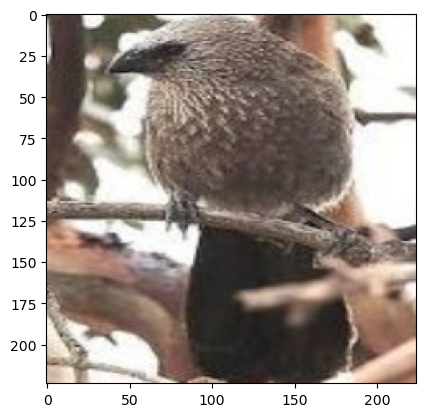

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS


In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

rawData = pd.read_csv('./archive_exploration/birds.csv')

base_path = './archive_exploration/'

img_path = base_path + rawData.loc[5325, 'filepaths']  

img = Image.open(img_path)
plt.imshow(img)
plt.show()

display(rawData)

<style>
	p {
		line-height: 180%;
	}
</style>
<p>As we can see above, the dataset has almost 90000 datapoints and 5 different features - <b><i>class id</i></b>, <b><i>filepaths</i></b>, <b><i>labels</i></b>, <b><i>dataset</i></b>, and <b><i>scientific name</i></b>. The <b><i>class id</i></b>, <b><i>labels</i></b>, and <b><i>scientific name</i></b> are self explanatory, the <b><i>filepaths</i></b> is a string which contains a path to the image of that particular datapoint. In the feature  <b><i>data set</i></b> we can see that the author of the dataset has already divided the data into train, valid, and test splits. </p>

In [187]:
#Check the feature's data types
print(rawData.dtypes)

print("\n\n")

#Print how many different values there are in each feature
for column in rawData.columns:
    print(column, ":", len(rawData[column].unique()))

class id           float64
filepaths           object
labels              object
data set            object
scientific name     object
dtype: object



class id : 525
filepaths : 89885
labels : 525
data set : 3
scientific name : 522


<style>
	p {
		line-height: 180%;
	}
</style>
<p>The feature datatypes are mostly objects as printed out above. That means that its values are categorical. The least categories are in the <b><i>data set</i></b> feature - 3 and the most is of course in the <b><i>filepaths</i></b> as each of those values should be unique. What is intersting is that the number of values for features <b><i>labels</i></b> and <b><i>scientific name</i></b> are not the same, 525 : 522. Let's investigate that further.</p>

In [188]:
print(rawData.groupby('scientific name')['labels'].nunique().sort_values(ascending=False))

print("\n\n")
print("PSITTACULA EUPATRIA:", rawData[rawData['scientific name'] == 'PSITTACULA EUPATRIA']['labels'].unique())
print("COLAPTES AURATUS:", rawData[rawData['scientific name'] == 'COLAPTES AURATUS']['labels'].unique())
print("COLUMBA LIVIA:", rawData[rawData['scientific name'] == 'COLUMBA LIVIA']['labels'].unique())

scientific name
PSITTACULA EUPATRIA         2
COLAPTES AURATUS            2
COLUMBA LIVIA               2
PASSERINA CYANEA            1
PARIDAE                     1
                           ..
DENDRAGAPUS OBSCURUS        1
DELICHON URBICUM            1
DACNIS CAYANA               1
DACELO                      1
ZOSTEROPS MADERASPATANUS    1
Name: labels, Length: 522, dtype: int64



PSITTACULA EUPATRIA: ['ALEXANDRINE PARAKEET' 'AMERICAN AVOCET']
COLAPTES AURATUS: ['GILDED FLICKER' 'NORTHERN FLICKER']
COLUMBA LIVIA: ['JACOBIN PIGEON' 'ROCK DOVE']


<style>
	p {
		line-height: 180%;
	}
</style>
<p>As it turns out there are 3 <b><i>scientific names</b></i> where each of them maps to 2 different <b><i>labels</b></i>, as you can see above. This indicates that the best idea is to classify by the <b><i>labels</b></i> feature as doing otherwise would cause the model to be unsufficient.</p>

In [189]:
#Check the percentage of missing values in each feature
print(rawData.isnull().mean())

#Check if there are any duplicate rows
print("\nNumber of duplicated rows:", rawData.duplicated().sum())

class id           0.0
filepaths          0.0
labels             0.0
data set           0.0
scientific name    0.0
dtype: float64

Number of duplicated rows: 0


<style>
	p {
		line-height: 180%;
	}
</style>
<p>Since we chose a well maintained dataset for our project we can see that there is 0 data missing, which means we can use the whole dataset without worries. We also checked if there are any duplicates in the dataset, it turns out there are not but it is a good habit to check that because if there were any duplicates we would like to get rid of them. The reason is that if one of the duplicated would be in the training set and another one in the test set it would compromise the performance of our model.</p>

<style>
	p {
		line-height: 180%;
	}
</style>
<h4>2.4 Identifying the target</h4>

<p>Our target is the feature <b><i>labels</i></b>. As argumented before it is a better choice than <b><i>scientific name</i></b> because of the duplicates present in that feature.</p>

<h2>3. Data preparation</h2>
<p>The main goal of the project is to enable the user to upload a picture of the bird and the model will identify the species. In the first steps the model is trained on the data in the existing dataset. This dataset contains images of predefined size with an aspect ratio of 1. This means that in order to use custom pictures, they have to be cropped and resized to the desired size and aspect ratio. </p>
<p>The code below aims to do exactly that. It uses a pre-trained Faster R-CNN model trained on the COCO dataset to identify a bird in the provided picture. The screenshot below shows a part of supported objects with their IDs. When the bird is identified (output label is 16, ID of a bird), size of a bounding box is established and the bird in the picture is cropped. The size of the box can be adjusted by changing the padding value. Another parameter that can be adjusted is how the bird is identified in the picture. By default, the pre-trained model chooses the prediction with the highest confidence score. If the useLargestBird argument is set to true, the model will pick the largest identified bird in the picture, which might be useful when there's multiple recognized objects.</p> 
<p> At this point, the image still has the wrong aspect ratio, so it is resized using the Lanczos resampling filter. (https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-filters) This action, however, distorts the bird, which might affect the accuracy of the species identification. </p> 
<p>Another way of handling the distortion when resizing images is to add 'zero padding' - borders of pixels with a value of zero (black) around an image to reach the desired size while keeping the aspect ratio. By setting showOutput=True in the detect_birds() method, all the versions of the entered picture are shown. These variations will then be used on the photos fed to the trained model to determine the best way of preprocessing the images.</p>

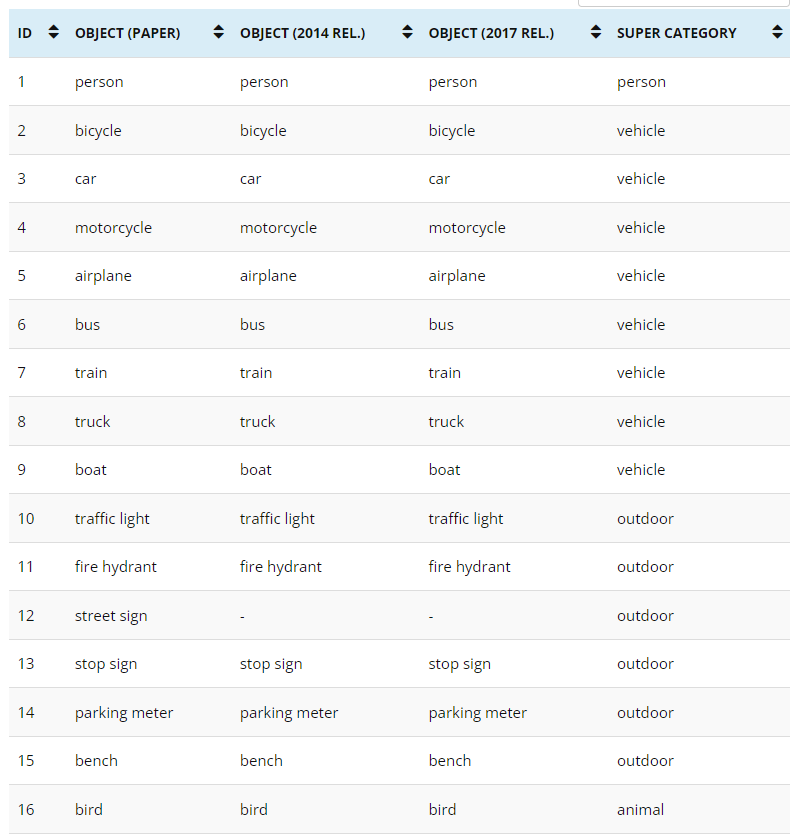 <br>
source: https://tech.amikelive.com/node-718/what-object-categories-labels-are-in-coco-dataset/

In [190]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
import requests
from io import BytesIO

# Function to load an image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return img

# Function to get the pre-trained Faster R-CNN model
def get_model():
    # Load a pre-trained model for object detection 
    model = fasterrcnn_resnet50_fpn(weights='DEFAULT')
    model.eval()
    return model

# TODO: test this 
def resize_with_aspect_ratio(image, output_size=(224, 224), fill_color=(0, 0, 0)):
    # Calculate the target aspect ratio.
    target_aspect_ratio = output_size[0] / output_size[1]

    # Calculate the aspect ratio of the input image.
    img_aspect_ratio = image.width / image.height

    if img_aspect_ratio > target_aspect_ratio:
        # The image is wider than the target aspect ratio. Resize based on width.
        new_width = output_size[0]
        new_height = round(new_width / img_aspect_ratio)
    else:
        # The image is as wide or taller than the target aspect ratio. Resize based on height.
        new_height = output_size[1]
        new_width = round(new_height * img_aspect_ratio)

    # Resize the image with preserved aspect ratio.
    resized_image = image.resize((new_width, new_height), Image.LANCZOS)

    # Create a new image with the desired output size, filled with the fill color (zero padding).
    final_image = Image.new("RGB", output_size, fill_color)
    paste_location = ((output_size[0] - new_width) // 2, (output_size[1] - new_height) // 2)
    final_image.paste(resized_image, paste_location)

    return final_image

def detect_birds(image, model, padding=15, output_size=(224, 224), showOutput=True, useLargestBird=False):
    img_tensor = F.to_tensor(image)

    with torch.no_grad():
        prediction = model([img_tensor])[0]

    selected_bird_box = None
    best_score = 0
    max_area = 0

    for box, label, score in zip(prediction['boxes'], prediction['labels'], prediction['scores']):
        if label.item() == 16:  # Bird class ID in COCO
            xmin, ymin, xmax, ymax = box.cpu().numpy()
            area = (xmax - xmin) * (ymax - ymin)

            if useLargestBird:
                # Choose the largest bird
                if area > max_area:
                    max_area = area
                    selected_bird_box = box.cpu().numpy()
                    best_score = score.item()
            else:
                # Choose the bird with the highest confidence score
                if score.item() > best_score:
                    best_score = score.item()
                    selected_bird_box = box.cpu().numpy()

    if selected_bird_box is not None:

        # Adjust the biggest bird box with padding
        padded_box = [selected_bird_box[0] - padding, 
                      selected_bird_box[1] - padding, 
                      selected_bird_box[2] + padding, 
                      selected_bird_box[3] + padding]

        # Crop the image based on the padded box
        cropped_image = image.crop(padded_box)

        # Resize the cropped image to the desired output size
        resized_image = cropped_image.resize(output_size, resample=Image.LANCZOS)

        if showOutput:
            # Create a copy of the original image for drawing
            image_copy = image.copy()
            draw = ImageDraw.Draw(image_copy)

            # Draw a rectangle around the biggest bird on the copy
            draw.rectangle(padded_box, outline="red", width=3)
            
            # Show the original image with the bounding box
            image_copy.show()  

            # Show the cropped image
            cropped_image.show()

            # Show the cropped and resized image
            resized_image.show() 

    return resized_image    
    
                
# Load the pre-trained model
model = get_model()

# Example image URLs
image_urls = [f"https://media.audubon.org/mockingbird-original-size.jpg",
f"https://t3.ftcdn.net/jpg/04/94/54/48/360_F_494544876_Rx7zW6g6SrDMPama0eIH9A3yt7CJNVo2.jpg",
f"https://t3.ftcdn.net/jpg/05/84/37/84/360_F_584378442_kNR9ao3gOWsgsqAkZGrl8BjnYmFOheHF.jpg",
f"https://images.unsplash.com/photo-1616878457313-267e383f8e41?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D",
f"https://www.zoopraha.cz/images/lexikon/drozd_zpevny_DSC_4292.jpg",
f"https://upload.wikimedia.org/wikipedia/commons/3/3c/%D0%92%D0%BE%D1%81%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D0%B8%D0%B1%D0%B8%D1%80%D1%81%D0%BA%D0%B0%D1%8F_%D1%87%D0%B0%D0%B9%D0%BA%D0%B0_%D0%B2_%D0%BF%D0%BE%D0%BB%D1%91%D1%82%D0%B5_-_Larus_vegae_mongolicus.jpg"]

for image in image_urls:
    image = load_image_from_url(image)
    detect_birds(image, model)



